<a href="https://colab.research.google.com/github/dekeu/Titanic_portfolio/blob/main/Titanic_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

**TRAIN DATA CLEANING & PLOTTING**

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender_data = pd.read_csv("gender_submission.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_data.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
#Making sure every column have a correct data types
train_data["Survived"] = train_data["Survived"].astype(int)
train_data["Pclass"] = train_data["Pclass"].astype(int)
train_data["Sex"] = train_data["Sex"].astype("category")
train_data ["Embarked"] = train_data["Embarked"].astype("category")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


In [ ]:
# Title extraction for grouping
titles = train_data["Name"].str.extract(r",\s*([^\.]+)\.", expand=False).str.strip()
mapping = {"Mlle":"Miss","Ms":"Miss","Mme":"Mrs","Lady":"Rare","Countess":"Rare","Sir":"Rare","Don":"Rare","Dona":"Rare","Jonkheer":"Rare","Capt":"Rare","Col":"Rare","Dr":"Rare","Rev":"Rare","Major":"Rare"}
train_data["Title"] = titles.replace(mapping)

# Age null imputation by Title x Pclass
train_data["Age"] = train_data.groupby(["Title","Pclass"])["Age"].transform(lambda s: s.fillna(s.median()))
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform(lambda s: s.median()))
train_data["HasCabin"] = train_data["Cabin"].notna().astype(int)

train_data.isna().sum().sort_values(ascending=False)

,0
Cabin,687
PassengerId,0
Pclass,0
Name,0
Sex,0
Survived,0
Age,0
SibSp,0
Ticket,0
Parch,0


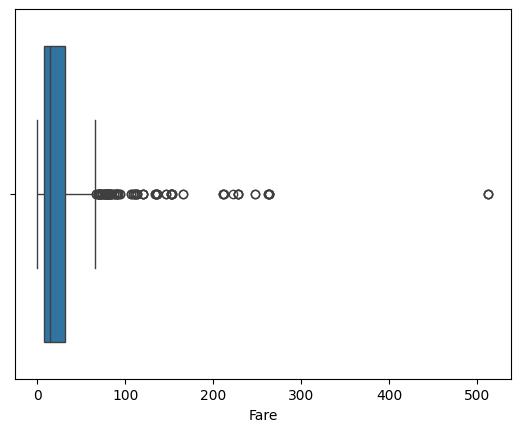

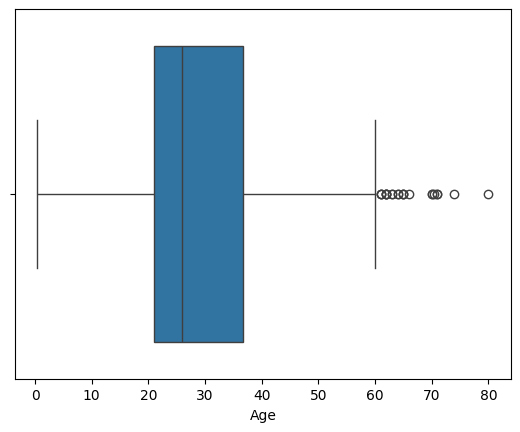

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=train_data["Fare"]); plt.show()
sns.boxplot(x=train_data["Age"]); plt.show()

In [ ]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]
train_data["IsAlone"] = (train_data["FamilySize"] == 0).astype(int)
train_data["FarePerPerson"] = train_data["Fare"] / (train_data["FamilySize"] + 1)
train_data["AgeGroup"] = pd.cut(train_data["Age"], bins=[0,12,18,35,60,100], labels=["child","teen","young","adult","senior"])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,HasCabin,FamilySize,IsAlone,FarePerPerson,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,0,3.62500,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,0,35.64165,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1,7.92500,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,0,26.55000,young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,8.05000,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,0,0,1,13.00000,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1,30.00000,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,3,0,5.86250,teen
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1,30.00000,young


**TRAIN DATA EXPLORATORY DATA ANALYSIS**

Objectives


*   Understand distributions and relationships
*   Identify risk patterns linked to survival



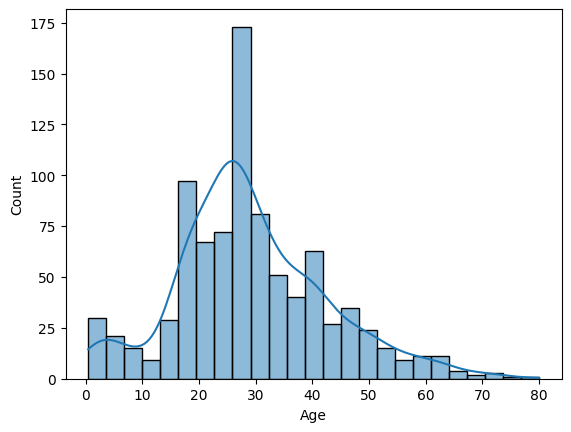

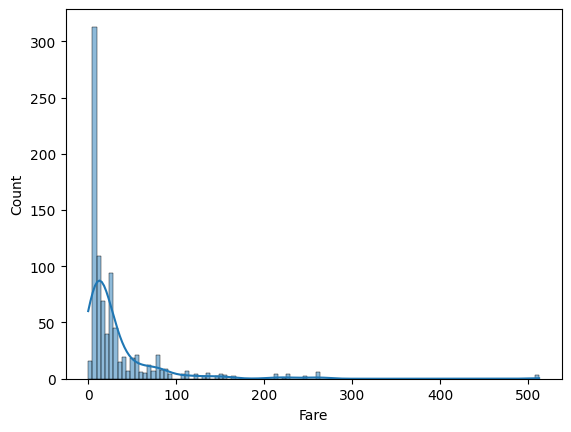

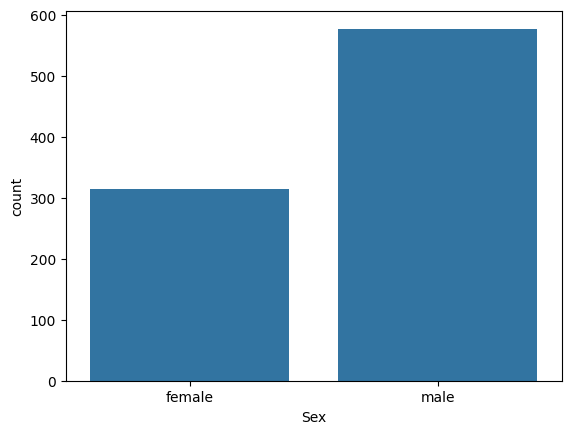

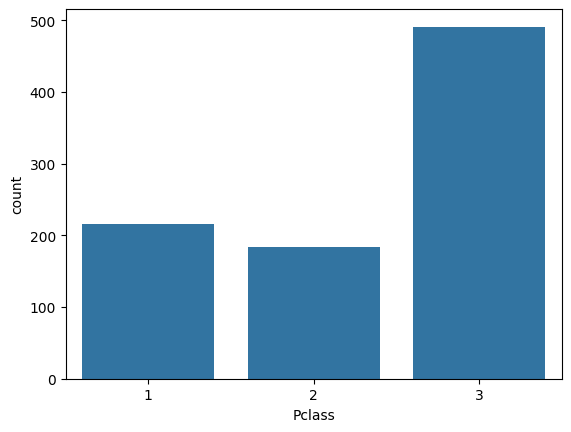

In [ ]:
#Univariate Distributions
sns.histplot(train_data["Age"], kde=True); plt.show()
sns.histplot(train_data["Fare"], kde=True); plt.show()
sns.countplot(data=train_data, x="Sex"); plt.show()
sns.countplot(data=train_data, x="Pclass"); plt.show()

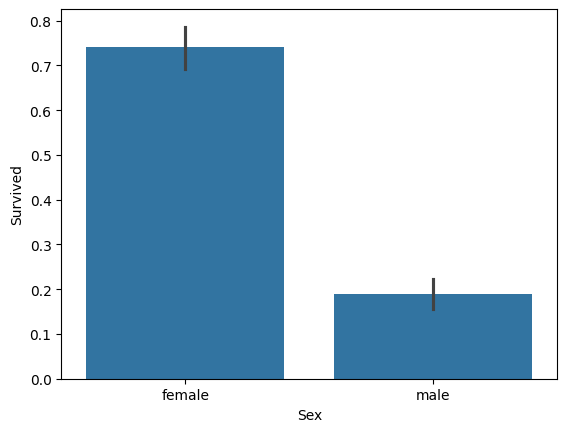

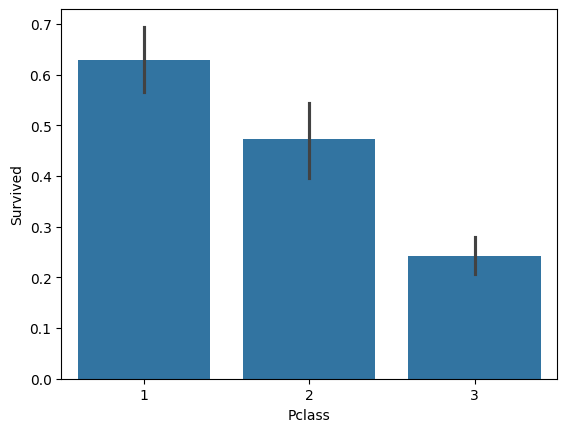

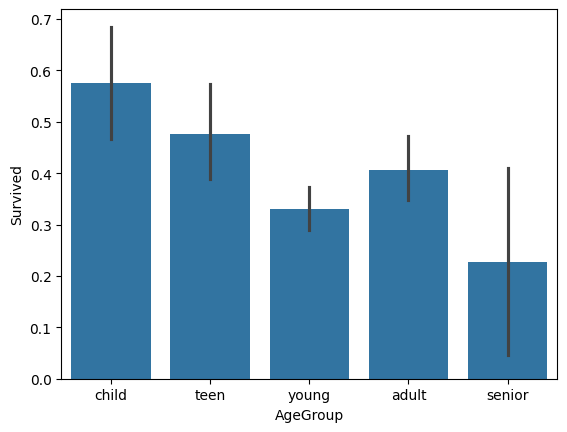

In [ ]:
#Bivariate Survival Analysis
sns.barplot(data=train_data, x="Sex", y="Survived", estimator=lambda x: sum(x)/len(x))
plt.show()
sns.barplot(data=train_data, x="Pclass", y="Survived", estimator=lambda x: sum(x)/len(x))
plt.show()
sns.barplot(data=train_data, x="AgeGroup", y="Survived")
plt.show()

/tmp/ipython-input-1129040536.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train_data.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")


<Axes: xlabel='Sex', ylabel='Pclass'>

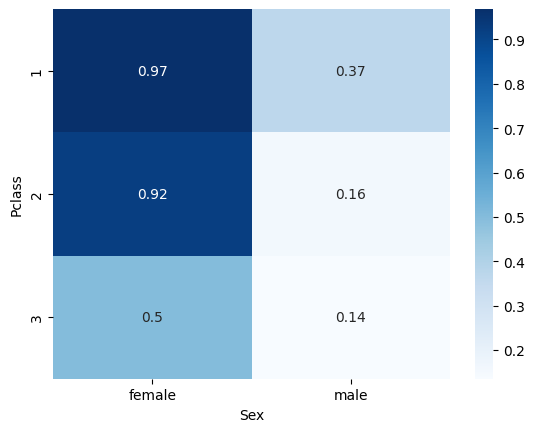

In [ ]:
#Multivariate Interactions
pivot = train_data.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="Blues")

<Axes: >

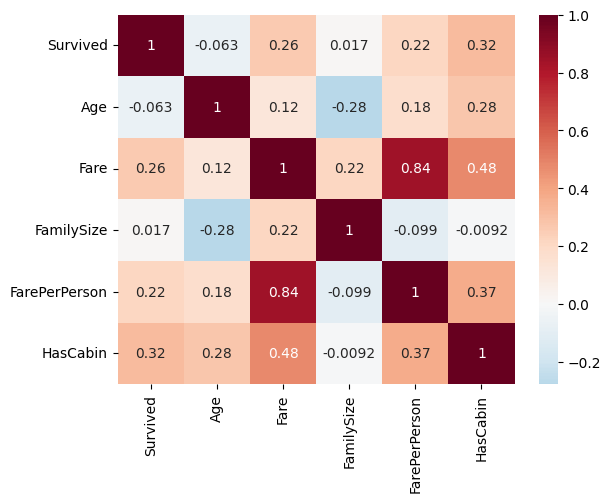

In [ ]:
#Numeric Correlations
num = train_data[["Survived","Age","Fare","FamilySize","FarePerPerson","HasCabin"]].corr()
sns.heatmap(num, annot=True, cmap="RdBu_r", center=0)

**Statistical Testing and Interpretation**



*   Quantify associations
*   Provide interpretable risk metrics



In [ ]:
#Chi-square tests (categorical vs numerical)
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square (var):
  table = pd.crosstab(train_data[var], train_data["Survived"])
  chi2, p, _, _ = chi2_contingency(table)
  return {"var":var, "chi2":chi2, "p":p}

results = [chi_square(v) for v in ["Sex","Pclass","Embarked","IsAlone","HasCabin"]]
pd.DataFrame(results)

,var,chi2,p
0,Sex,260.717020,1.197357e-58
1,Pclass,102.888989,4.549252e-23
2,Embarked,25.964453,2.300863e-06
3,IsAlone,36.000514,1.972654e-09
4,HasCabin,87.941486,6.741970e-21


The bigger the chi2, the stronger the relationship between survival and the variable. The p values mean otherwise.

In [ ]:
#T-tests / ANOVA (numeric vs survival)
from scipy.stats import ttest_ind
surv = train_data[train_data["Survived"]==1]["Age"].dropna()
nons = train_data[train_data["Survived"]==0]["Age"].dropna()
ttest_ind(surv, nons, equal_var=False)

TtestResult(statistic=np.float64(-1.83264680562656), pvalue=np.float64(0.06729930335466419), df=np.float64(669.1414913067816))

The T-statistic = -1.83 shows that survivors were slightly younger on average

p-value = 0.0673 shows that this difference is not statistically significant at the 0.05 level (We can't confidently say that age alone made a big difference in survival)

In [ ]:
#Odds ratios (logistic regression)
import statsmodels.api as sm
X = pd.get_dummies(train_data[["Sex","Pclass","IsAlone","HasCabin","Age","Fare"]], drop_first=True)
X = X.astype(int)
X = sm.add_constant(X)
y = train_data["Survived"]
model = sm.Logit(y, X).fit(disp=False)
odds = model.params.apply(lambda b : np.exp(b))
conf = model.conf_int().apply(np.exp)
pd.DataFrame({"odds_ratio":odds, "ci_low":conf[0],"ci_high":conf[1]})

,odds_ratio,ci_low,ci_high
const,77.528562,23.796595,252.585633
Pclass,0.351935,0.251163,0.493138
IsAlone,1.175828,0.800001,1.728211
HasCabin,1.946453,1.100607,3.442355
Age,0.961530,0.946921,0.976365
Fare,0.999936,0.995826,1.004064
Sex_male,0.073168,0.049882,0.107324


The results show which features increase or decrease survival chances, and how much.

**Predictive Modeling and Evaluation**

Objectives


*   Train baseline and stronger models
*   Ensure probability calibration and robust validation



In [ ]:
#Train/validation split
from sklearn.model_selection import train_test_split
y = train_data["Survived"]
x = train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","IsAlone","FarePerPerson","Title","HasCabin"]]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
#Preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num = ["Age","Fare","FamilySize","FarePerPerson"]
cat = ["Pclass","Sex","Embarked","IsAlone","Title","HasCabin"]

pre = ColumnTransformer([
    ("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]),num),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),( "oh", OneHotEncoder(handle_unknown="ignore"))]),cat)
])

In [ ]:
#Models

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

logreg = Pipeline ([("pre", pre), ("clf", CalibratedClassifierCV(LogisticRegression(max_iter=1000, class_weight = "balanced"), method = "sigmoid", cv=5))])
logreg.fit(x_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'FamilySize',
                                                   'FarePerPerson']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'IsAlone', 'Title',
                                                   'HasCabin'])])),
                ('clf',
                 CalibratedClassifierCV(cv=5,
                                        estimator=LogisticRegression(class_weight='balanced',
                                                                     max_iter=1000)))])

In [ ]:
#Evaluation Metrics

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, brier_score_loss
import numpy as np

proba = logreg.predict_proba(x_val)[:,1]
pred = (proba>= 0.5).astype(int)
metrics = {
    "auc":roc_auc_score(y_val, proba),
    "f1":f1_score(y_val, pred),
    "precision":precision_score(y_val, pred),
    "recall":recall_score(y_val, pred),
    "brier":brier_score_loss(y_val, proba)
}
pd.DataFrame(metrics, index=[0])
metrics

{'auc': np.float64(0.8683794466403162),
 'f1': 0.7761194029850746,
 'precision': 0.8,
 'recall': 0.7536231884057971,
 'brier': np.float64(0.13177100783090476)}

In [ ]:
#Feature Importance / Explainability
from sklearn.inspection import permutation_importance
r = permutation_importance(logreg, x_val, y_val, n_repeats=10, random_state=42)
#Map feature importances back to original feature names
feature_names = x_val.columns
importances = pd.DataFrame({"feature":feature_names, "importance":r.importances_mean}).sort_values("importance", ascending=False)
importances

,feature,importance
1,Sex,0.100559
10,Title,0.095531
7,FamilySize,0.049721
2,Age,0.049162
0,Pclass,0.021788
9,FarePerPerson,0.004469
8,IsAlone,0.003352
5,Fare,0.001676
3,SibSp,0.000000
4,Parch,0.000000


In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(logreg, x, y, cv=cv, scoring="roc_auc").mean()
cv_auc


np.float64(0.8722211906483593)

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print ("% of women who survived:" , rate_women, " from", len(women))

% of women who survived: 0.7420382165605095  from 314


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print ("% of men who survived:" , rate_men, " from", len(men))

% of men who survived: 0.18890814558058924  from 577
